In [18]:
import pandas as pd 

In [21]:
# data ingestion step 
data = pd.read_csv('twitter.csv')

In [23]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [24]:
# creating extra feature to detect whether the speech is hate_speech , offensive_language 
data['labels'] = data['class'].map({0: "Hate Speech", 
                                         1: "Offensive Language",
                                         2: "NO Hate or Offensive Language"})

In [26]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,NO Hate or Offensive Language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [36]:
# As we have created the dependent column using class column 
# so now we just need to predict tweets that it is hate_speech , 
# offensive_language or neither of this so we only need two features 
# (tweet , lables) to predict speech 

# so have created separate dataset using (tweet , lables) this two features 
dataset = data[['tweet' , 'labels']]

In [37]:
# here we get our dataset 
dataset

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,NO Hate or Offensive Language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,NO Hate or Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [38]:
# Let's start data cleaning 
import warnings
warnings.filterwarnings("ignore") # to ignore warnings 
import re # --> Removing special characters and non-alphanumeric characters.
import nltk # --> nltk / Tokenization splits a sentence into individual words or tokens.
import string
nltk.download('omw-1.4')
from nltk.corpus import stopwords # --> generally used to remove stopwords like 'is' , 'of' 'an' etc
stopwords = set(stopwords.words('english'))

#importing Stemming
stemmer = nltk.SnowballStemmer("english") # it is used reduce words to their base or root form 
# For example, the words "running," "ran," and "runner" might all be stemmed to the root form "run."

def clean_data(text):
        text = str(text).lower()
#         text = re.sub('http?://\S+[www\.s+', '', text)
        text = re.sub(r'http\S+', '', text)

        text = re.sub('\[.*?\]', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        
        # Stop word removal
        text = [word for word in text.split(' ') if word not in stopwords]
        text = " ".join(text)
        
        # Stemming the text
        text = [stemmer.stem(word) for word in text.split(' ')]
        text = " ".join(text)
        
        return text 


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mahen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
dataset['tweet'] = dataset['tweet'].apply(clean_data)

In [40]:
dataset

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,NO Hate or Offensive Language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivaba look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,NO Hate or Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [41]:
# creating numpy array's / creating indpendent and dependent features 

import numpy as np
x = np.array(dataset['tweet'])
y = np.array(dataset['labels'])

In [42]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [43]:
y

array(['NO Hate or Offensive Language', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'NO Hate or Offensive Language'],
      dtype=object)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer # --> Feature engineering 
from sklearn.model_selection import train_test_split # --> doing train_test_split

In [45]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [47]:
# doing train test split to split our dataset into training data and testing data 
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.33 , random_state = 123)

In [48]:
# Let's start to build our model 
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier() # --> Creating the object of the DecisionTreeClassifier to train our model

In [50]:
dt.fit(X_train , y_train) #--> Training our DecisionTreeClassifier model using training and test data

DecisionTreeClassifier()

In [51]:
# making prediction using test data 
y_pred = dt.predict(X_test)

In [52]:
y_pred

array(['Hate Speech', 'Offensive Language', 'Offensive Language', ...,
       'NO Hate or Offensive Language', 'Offensive Language',
       'Hate Speech'], dtype=object)

In [53]:
# checking the confusion matrix and accuracy of the model 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 158,   46,  278],
       [  78, 1130,  159],
       [ 294,  239, 5797]], dtype=int64)

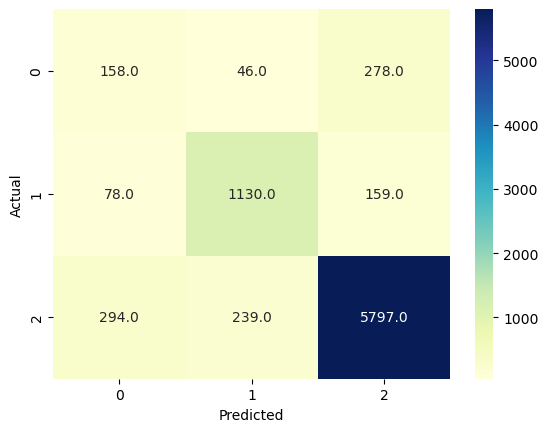

In [54]:
# Creating heatmap using Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `cm` is your confusion matrix
# You can replace `cmap` with your preferred colormap (e.g., 'coolwarm', 'viridis', etc.)

# Create the heatmap
sns.heatmap(cm, annot=True, fmt=".1f", cmap="YlGnBu")

# Optionally, you can add labels for the axes
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


In [57]:
# checking the accuracy score of the model 
from sklearn.metrics import accuracy_score 
accuracy_score(y_test , y_pred)

0.8662428169702898

In [60]:
sample_data = "Let’s Kill Jews, and let’s kill them for fun."

array(['Hate Speech'], dtype=object)

In [74]:
# Creating a function to predict speech data
def Predict_speech(data):
    data = clean_data(data)  # Clean the input data
    sample = cv.transform([data]).toarray()  # Transform the cleaned data into a numerical array
    return dt.predict(sample)

In [75]:
Predict_speech(sample_data)

array(['Hate Speech'], dtype=object)